# Nuclear Densities Challenge

The purpose of this challenge is for you to be able to choose a new location for an experimental measurement on electron scattering using Bayesian methods.

The details and data for this challenge are found here: https://journals.aps.org/prc/abstract/10.1103/PhysRevC.94.034316

Your task is to:

- Code the density $\rho(r)$ and form factor $f(q)$ (Eqs. 3 and 4) as a function of r and q respectively, and the two parameters "a" and "c".
- Write down your prior and likelihood function for two given measurement in the form factor F(q). For the "y" values of the measurements use values produced by your model for the parameters $c=6.7$ and $a=0.5$ fm. Assume Gaussian errors of $0.005$. For the prior see Table I. 
- Fix the first q value to $q_1=0.2\ fm^{-1}$. Perform the Metropolis sampling of the posterior for $c$ and $a$ and calculate the variability of your prediction $F(q)$ (See Fig. 2) as a function of $q$ and select the location for the new measurement $q_2$ that maximizes the variability.
- Compare the posterior distributions with a single $q_1$ and the pair $\{q_1,q_2\}$. Compare your results to Figure 1 and 3. 
- Make a uncertainty band prediction for the density $\rho(r)$ from your posterior samples. Compare to Figure 4.
- What would happen if you use a different utility function? For example the total uncertainty in the radius R? What if we want to add even more measuring locations?


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Smart code goes here... 

def fermiFunc(r_,c_,a_):
    return 1 / (1 + np.exp((r_-c_)/a_))

def sFermi(r_,c_,a_):
    return fermiFunc(r_,c_,a_) + fermiFunc(-r_,c_,a_) - 1

def density(r_,c_,a_):
    rho0 = 3 / (4*np.pi*c_*(c_**2 + np.pi**2 * a_**2))
    return rho0 * sFermi(r_,c_,a_)

def formFactor(q_,c_,a_):
    term1 = 3 / (q_*c_*((q_*c_)**2 + (np.pi*q_*a_)**2))
    term2 = np.pi * q_ * a_ / np.sinh(np.pi * q_ * a_)
    term3 = np.pi*q_*a_*np.sin(q_*a_) / np.tanh(np.pi*q_*a_) - q_*c_*np.cos(q_*c_)
    return term1 * term2 * term3



From the paper, we use the likelihood function:

\begin{equation}
    p(F|\omega)=e^{-\frac{1}{2}\chi^2(F;\omega)}, \quad {\rm where}\quad \chi^2(F;\omega) = \frac{\left[F_{SF}(q_1;\omega) - F_{\rm exp}(q_1)\right]^2}{\Delta F^2_{\rm exp}(q_1)}
\end{equation}
with $\Delta F_{\rm exp}$ being the experimental error and $\omega=\{a,c\}$. Priors from Table 1 have a *relative* standard deviation of $\sigma_c=3.342$ fm and the values are $\tilde{c}=6.683,\tilde{a}=0.494$.

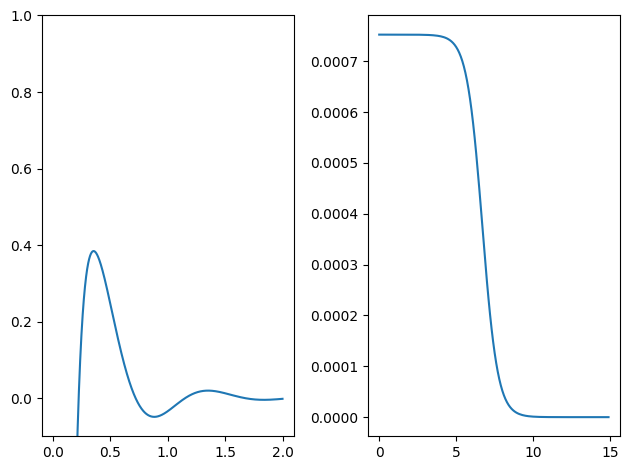

In [11]:
# Plot of density and form factor
q = np.arange(0.001,2,0.001)
r = np.arange(0,15,0.1)

c = 6.7
a = 0.5

fig, ax = plt.subplots(1,2)

ax[0].plot(q,formFactor(q,c,a))
ax[1].plot(r,density(r,c,a))

ax[0].set_ylim(-0.1,1)

fig.tight_layout()

In [3]:
def chi2(q_,c_,a_):
    # Experimental values
    q_exp, c_exp, a_exp = 1, 6.683, 0.494
    expError = 0.880
    return (formFactor(q_,c_,a_) - formFactor(q_exp,c_exp,a_exp))**2 / (expError)

def likelihood(q_,c_,a_):
    return np.exp(-0.5 * chi2(q_,c_,a_))